In [1]:
import pandas as pd
import numpy as np
import os
import time
import matplotlib.pyplot as plt

In [2]:
data_path = '/opt/ml/input/data/train'
train_df = pd.read_csv(os.path.join(data_path, 'train_ratings.csv')) # 전체 학습 데이터
year_data = pd.read_csv(os.path.join(data_path, 'years.tsv'), sep='\t')
writer_data = pd.read_csv(os.path.join(data_path, 'writers.tsv'), sep='\t')
title_data = pd.read_csv(os.path.join(data_path, 'titles.tsv'), sep='\t')
genre_data = pd.read_csv(os.path.join(data_path, 'genres.tsv'), sep='\t')
director_data = pd.read_csv(os.path.join(data_path, 'directors.tsv'), sep='\t')

In [3]:
train_df

,user,item,time
0,11,4643,1230782529
1,11,170,1230782534
2,11,531,1230782539
3,11,616,1230782542
4,11,2140,1230782563
...,...,...,...
5154466,138493,44022,1260209449
5154467,138493,4958,1260209482
5154468,138493,68319,1260209720
5154469,138493,40819,1260209726


# 시간 형식 바꾸기.

In [4]:
train_df['time'] = train_df['time'].apply(lambda x: time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(x)))

In [5]:
sub_df = train_df['time'].str.split(expand=True)
sub_df.columns = ['ymd', 'hms']
sub_df

,ymd,hms
0,2009-01-01,04:02:09
1,2009-01-01,04:02:14
2,2009-01-01,04:02:19
3,2009-01-01,04:02:22
4,2009-01-01,04:02:43
...,...,...
5154466,2009-12-07,18:10:49
5154467,2009-12-07,18:11:22
5154468,2009-12-07,18:15:20
5154469,2009-12-07,18:15:26


In [6]:
train_df

,user,item,time
0,11,4643,2009-01-01 04:02:09
1,11,170,2009-01-01 04:02:14
2,11,531,2009-01-01 04:02:19
3,11,616,2009-01-01 04:02:22
4,11,2140,2009-01-01 04:02:43
...,...,...,...
5154466,138493,44022,2009-12-07 18:10:49
5154467,138493,4958,2009-12-07 18:11:22
5154468,138493,68319,2009-12-07 18:15:20
5154469,138493,40819,2009-12-07 18:15:26


In [7]:
ymd_df = sub_df['ymd'].str.split('-', expand=True)
ymd_df.columns = ['year', 'month', 'day']
hms_df = sub_df['hms'].str.split(':', expand=True)
hms_df.columns = ['hour', 'minute', 'second']
train_df = pd.concat([train_df, ymd_df], axis=1)
train_df = pd.concat([train_df, hms_df], axis=1)
train_df.drop(['time'], axis=1, inplace=True)
train_df

,user,item,year,month,day,hour,minute,second
0,11,4643,2009,01,01,04,02,09
1,11,170,2009,01,01,04,02,14
2,11,531,2009,01,01,04,02,19
3,11,616,2009,01,01,04,02,22
4,11,2140,2009,01,01,04,02,43
...,...,...,...,...,...,...,...,...
5154466,138493,44022,2009,12,07,18,10,49
5154467,138493,4958,2009,12,07,18,11,22
5154468,138493,68319,2009,12,07,18,15,20
5154469,138493,40819,2009,12,07,18,15,26


In [8]:
# 1. user의 고유 수 확인
train_df['user'].nunique()

31360

In [9]:
user_grouped = train_df.groupby(train_df['user'])['item'].count().sort_values(ascending=False)
user_grouped

user
8405      2912
54465     1980
24219     1842
32514     1830
91349     1795
          ... 
11211       32
128756      28
105578      22
68606       19
53188       16
Name: item, Length: 31360, dtype: int64

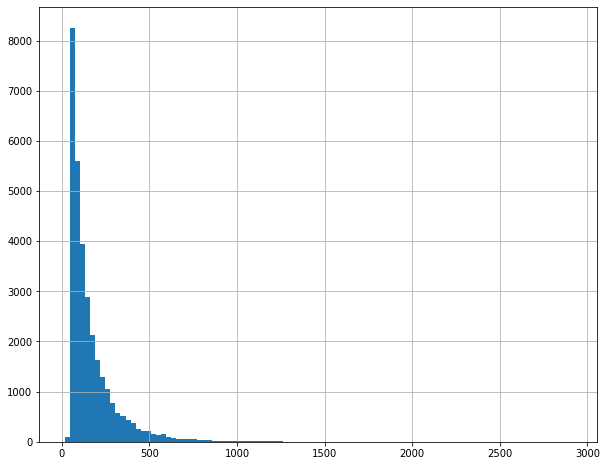

In [10]:
#영화를 적게 본 사람이 몰려 있음
user_grouped = train_df.groupby(train_df['user'])['item'].count().hist(figsize=(10,8), bins=100)

<Axes: >

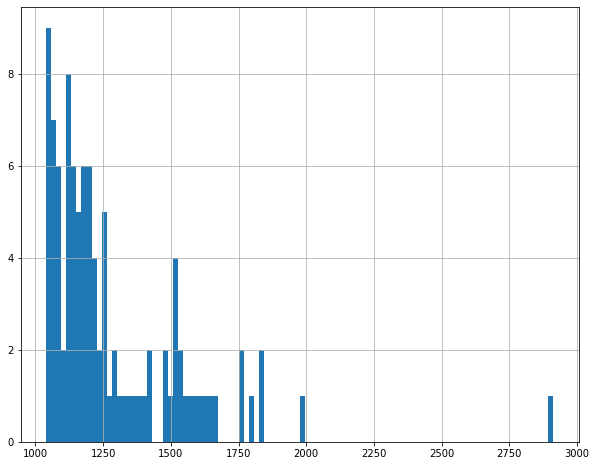

In [11]:
#상위 100명의 정보
user_grouped_100 = train_df.groupby(train_df['user'])['item'].count().sort_values(ascending=False)[:100].hist(figsize=(10,8), bins=100)
user_grouped_100

# 유저가 대부분 어느 시간대에 봤는지 확인

In [12]:
# 2005~2015년도에 본 영화 정보임.
# 비교적 오래된 영화가 많음.
train_df.groupby('year')['user'].count()

year
2005    572894
2006    647240
2007    589945
2008    679269
2009    517366
2010    510385
2011    427103
2012    421942
2013    338109
2014    308281
2015    141937
Name: user, dtype: int64

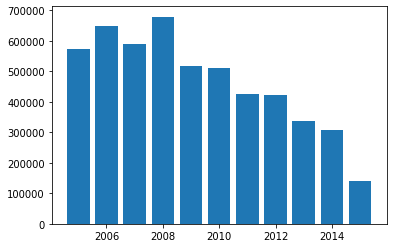

In [13]:
#오래된 작품이 조금 더 많음
a=train_df.groupby('year')['user'].count().index.astype(int)
b=train_df.groupby('year')['user'].count().values

plt.bar(a,b)
plt.show()

In [14]:
train_df.groupby('hour')['user'].count()

hour
00    260333
01    247278
02    248449
03    245660
04    194326
05    181742
06    163859
07    142462
08    136983
09    129500
10    128354
11    132765
12    149108
13    163815
14    184949
15    208895
16    225104
17    247125
18    272171
19    300987
20    311435
21    314571
22    292308
23    272292
Name: user, dtype: int64

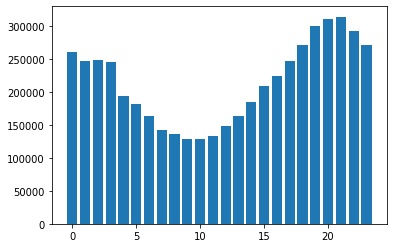

In [15]:
# 보통 저녁, 새벽 시간대에 많이 시청하는 것을 알 수 있음
a=train_df.groupby('hour')['user'].count().index.astype(int)
b=train_df.groupby('hour')['user'].count().values

plt.bar(a,b)
plt.show()

In [16]:
#item 중복 개수를 통해 year, writer, director데이터에 결측치가 있을 것.
print(train_df['item'].nunique())
print(year_data['item'].nunique())
print(writer_data['item'].nunique())
print(title_data['item'].nunique())
print(genre_data['item'].nunique())
print(director_data['item'].nunique())

6807
6799
5648
6807
6807
5503


# Year 데이터 확인

In [17]:
year_data

,item,year
0,1348,1922
1,44587,1922
2,4768,1922
3,8235,1923
4,8609,1923
...,...,...
6794,114795,2014
6795,110771,2014
6796,112804,2014
6797,113378,2014


In [44]:
train_df.isna().sum()

user      0
item      0
year      0
month     0
day       0
hour      0
minute    0
second    0
dtype: int64

In [18]:
year_data['year'].value_counts().sort_index()

1922      3
1923      2
1924      5
1925      6
1926      2
       ... 
2010    213
2011    185
2012    140
2013    134
2014     76
Name: year, Length: 93, dtype: int64

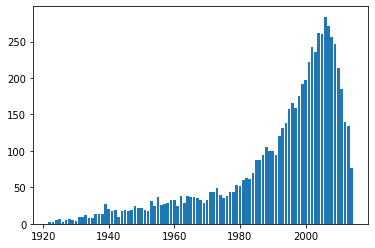

In [19]:
#후반부 작품이 주를 이룸.
a=year_data.groupby('year')['item'].count().index.astype(int)
b=year_data.groupby('year')['item'].count().values

plt.bar(a,b)
plt.show()


# Writer 데이터 확인.

In [20]:
writer_data

,item,writer
0,1237,nm0000005
1,5147,nm0000005
2,7327,nm0000005
3,2068,nm0000005
4,7396,nm0000005
...,...,...
11301,27397,nm5371819
11302,2987,nm5927607
11303,33463,nm5927607
11304,2987,nm5927608


In [21]:
#작가 고유 수 확인
writer_data.nunique()

item      5648
writer    2989
dtype: int64

In [22]:
writer_data.groupby('writer')['item'].count()

writer
nm0000005    18
nm0000019    10
nm0000033     5
nm0000036     2
nm0000040    11
             ..
nm5022110     5
nm5335213     2
nm5371819     3
nm5927607     2
nm5927608     2
Name: item, Length: 2989, dtype: int64

In [23]:
writer_data.groupby('writer')['item'].count().describe()

count    2989.000000
mean        3.782536
std         2.993783
min         2.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        47.000000
Name: item, dtype: float64

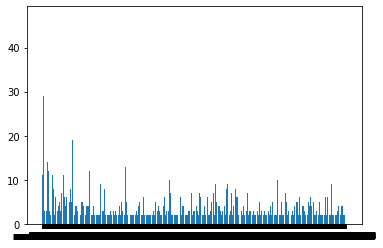

In [24]:
#한 작가가 각본한 영화의 개수가 얼추 비슷.
a=writer_data.groupby('writer')['item'].count().index
b=writer_data.groupby('writer')['item'].count().values

plt.bar(a,b)
plt.show()

# title 데이터 확인

In [25]:
title_data

,item,title
0,318,"Shawshank Redemption, The (1994)"
1,2571,"Matrix, The (1999)"
2,2959,Fight Club (1999)
3,296,Pulp Fiction (1994)
4,356,Forrest Gump (1994)
...,...,...
6802,73106,American Pie Presents: The Book of Love (Ameri...
6803,109850,Need for Speed (2014)
6804,8605,Taxi 3 (2003)
6805,3689,Porky's II: The Next Day (1983)


In [26]:
#중복 개수가 다름 -> 아이템 번호가 다른데 같은 title인 이상치가 하나 존재.
title_data.nunique()

item     6807
title    6806
dtype: int64

In [27]:
title_data.groupby('title')['item'].count()

title
"Great Performances" Cats (1998)                 1
'Round Midnight (1986)                           1
'Salem's Lot (2004)                              1
'burbs, The (1989)                               1
(500) Days of Summer (2009)                      1
                                                ..
loudQUIETloud: A Film About the Pixies (2006)    1
xXx (2002)                                       1
xXx: State of the Union (2005)                   1
¡Three Amigos! (1986)                            1
À nous la liberté (Freedom for Us) (1931)        1
Name: item, Length: 6806, dtype: int64

In [28]:
temp = title_data.groupby('title')['item'].count().reset_index()
temp[temp['item']==2]

,title,item
6496,War of the Worlds (2005),2


In [29]:
#같은 이름에 다른 item 번호인 이상치가 존재. -> 처리 요망.
title_data[title_data['title']=='War of the Worlds (2005)']

,item,title
349,34048,War of the Worlds (2005)
1926,64997,War of the Worlds (2005)


# Genre 데이터 처리

In [30]:
#한 아이템에 여러 장르가 하나씩 분포.
genre_data

,item,genre
0,318,Crime
1,318,Drama
2,2571,Action
3,2571,Sci-Fi
4,2571,Thriller
...,...,...
15928,109850,Drama
15929,8605,Action
15930,8605,Comedy
15931,3689,Comedy


In [31]:
#아이템 고유 개수는 같으므로 장르를 한번에 넣어주면 됨 -> 원 핫 인코딩 사용도 가능. (전체 장르의 종류가 18개 이므로)
genre_data.nunique()

item     6807
genre      18
dtype: int64

In [32]:
genre_data.groupby('genre')['item'].count()

genre
Action         1246
Adventure       891
Animation       355
Children        432
Comedy         2408
Crime           924
Documentary     323
Drama          3490
Fantasy         557
Film-Noir        97
Horror          602
Musical         282
Mystery         471
Romance        1251
Sci-Fi          653
Thriller       1466
War             346
Western         139
Name: item, dtype: int64

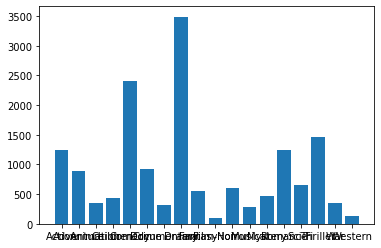

In [33]:
#들쑥날쑥한 분포.
a=genre_data.groupby('genre')['item'].count().index
b=genre_data.groupby('genre')['item'].count().values

plt.bar(a,b)
plt.show()

# Director 데이터 처리.

In [34]:
director_data

,item,director
0,1237,nm0000005
1,5147,nm0000005
2,7327,nm0000005
3,2068,nm0000005
4,7396,nm0000005
...,...,...
5900,84273,nm2879822
5901,58376,nm2879822
5902,65225,nm2879822
5903,2394,nm9054338


In [35]:
#merge시 데이터 결측치를 채워야함.
director_data.nunique()

item        5503
director    1340
dtype: int64

In [36]:
director_data.groupby('director')['item'].count()

director
nm0000005    19
nm0000019     9
nm0000033    33
nm0000036     8
nm0000037     4
             ..
nm2588606     3
nm2648685     2
nm2676052     2
nm2879822     3
nm9054338     2
Name: item, Length: 1340, dtype: int64

In [37]:
#정보 획득 가능
director_data.groupby('director')['item'].count().describe()

count    1340.000000
mean        4.406716
std         3.633030
min         2.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        44.000000
Name: item, dtype: float64

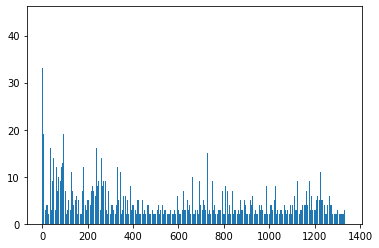

In [38]:
a=np.arange(len(director_data.groupby('director')['item'].count()))
b=director_data.groupby('director')['item'].count().values

plt.bar(a,b)
plt.show()

In [39]:
# max값 44가 그래프 상에 안보임 -> 그래프 오류인지 데이터 오류인지 확인.
director_data.groupby('director')['item'].count().values.max()

44

In [40]:
temp = director_data.groupby('director')['item'].count().reset_index()
temp[temp['item']==44]

,director,item
12,nm0000095,44


In [41]:
# 44존재.
director_data.groupby('director')['item'].count().head(20)

director
nm0000005    19
nm0000019     9
nm0000033    33
nm0000036     8
nm0000037     4
nm0000040    12
nm0000041    19
nm0000045     2
nm0000059     3
nm0000076     9
nm0000078     2
nm0000080    10
nm0000095    44
nm0000108     8
nm0000110     9
nm0000114     3
nm0000116     7
nm0000118    17
nm0000122     9
nm0000123     4
Name: item, dtype: int64

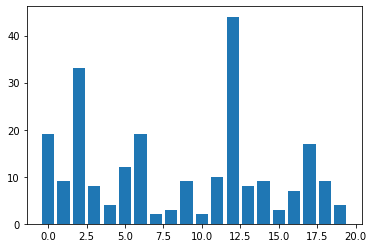

In [42]:
#그래프 x축 범위 줄였더니 44 확인됨 -> 그래프 오류
a=np.arange(len(director_data.groupby('director')['item'].count().head(20)))
b=director_data.groupby('director')['item'].count().head(20).values

plt.bar(a,b)
plt.show()

In [60]:
train_df = pd.merge(train_df,year_data, on='item', how='left')
train_df = pd.merge(train_df,writer_data, on='item', how='left')
train_df = pd.merge(train_df,title_data, on='item', how='left')
train_df = pd.merge(train_df,genre_data, on='item', how='left')
train_df = pd.merge(train_df,director_data, on='item', how='left')
train_df

MemoryError: Unable to allocate 24.0 GiB for an array with shape (11, 293430019) and data type object

In [58]:
train_df[train_df['item']==34048]

,user,item,year_x,month,day,hour,minute,second,year_y,writer,title,genre,director
1416,11,34048,2009,01,01,05,41,29,2005.0,nm0295264,War of the Worlds (2005),Action,nm0000229
1417,11,34048,2009,01,01,05,41,29,2005.0,nm0295264,War of the Worlds (2005),Adventure,nm0000229
1418,11,34048,2009,01,01,05,41,29,2005.0,nm0295264,War of the Worlds (2005),Sci-Fi,nm0000229
1419,11,34048,2009,01,01,05,41,29,2005.0,nm0295264,War of the Worlds (2005),Thriller,nm0000229
1420,11,34048,2009,01,01,05,41,29,2005.0,nm0462895,War of the Worlds (2005),Action,nm0000229
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48264240,138493,34048,2009,11,16,16,59,18,2005.0,nm0462895,War of the Worlds (2005),Thriller,nm0000229
48264241,138493,34048,2009,11,16,16,59,18,2005.0,nm0920229,War of the Worlds (2005),Action,nm0000229
48264242,138493,34048,2009,11,16,16,59,18,2005.0,nm0920229,War of the Worlds (2005),Adventure,nm0000229
48264243,138493,34048,2009,11,16,16,59,18,2005.0,nm0920229,War of the Worlds (2005),Sci-Fi,nm0000229


In [59]:
train_df[train_df['item']==64997]

,user,item,year_x,month,day,hour,minute,second,year_y,writer,title,genre,director


In [56]:
train_df.loc[train_df[train_df['item']==64997].index,'item']=34048

In [57]:
train_df[train_df['item']==64997]

,user,item,year_x,month,day,hour,minute,second,year_y,writer,title,genre,director
